<a href="https://colab.research.google.com/github/robin-ochieng/Machine-Learning/blob/main/Decision_Tree_used_in_machine_learnng_by_R_O_O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Tree Classifier


In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
# Loading iris dataset from scikit-learn library and creating a pandas dataframe
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)


In [3]:
# Adding target variable 'species' to the dataframe
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [4]:
df.head(11)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
# Creating decision tree classifier object
clf = DecisionTreeClassifier(random_state=1)

In [6]:
from sklearn.model_selection import cross_validate
# Performing cross validation and getting accuracy scores
cv_results = cross_validate(clf, df[iris.feature_names], df['species'], cv=5)
accuracy_scores = cv_results['test_score']

In [7]:
# Printing the mean and standard deviation of accuracy scores
print('Accuracy Scores:', accuracy_scores)
print('Mean Accuracy Score:', accuracy_scores.mean())
print('Standard Deviation of Accuracy Scores:', accuracy_scores.std())

Accuracy Scores: [0.96666667 0.96666667 0.9        1.         1.        ]
Mean Accuracy Score: 0.9666666666666668
Standard Deviation of Accuracy Scores: 0.036514837167011066


In [26]:
# Splitting the dataset into train and test sets
train = df.sample(frac=0.8, random_state=1)
test = df.drop(train.index)


ValueError: ignored

In [9]:
# Fitting decision tree classifier on the training set
clf.fit(train[iris.feature_names], train['species'])

DecisionTreeClassifier(random_state=1)

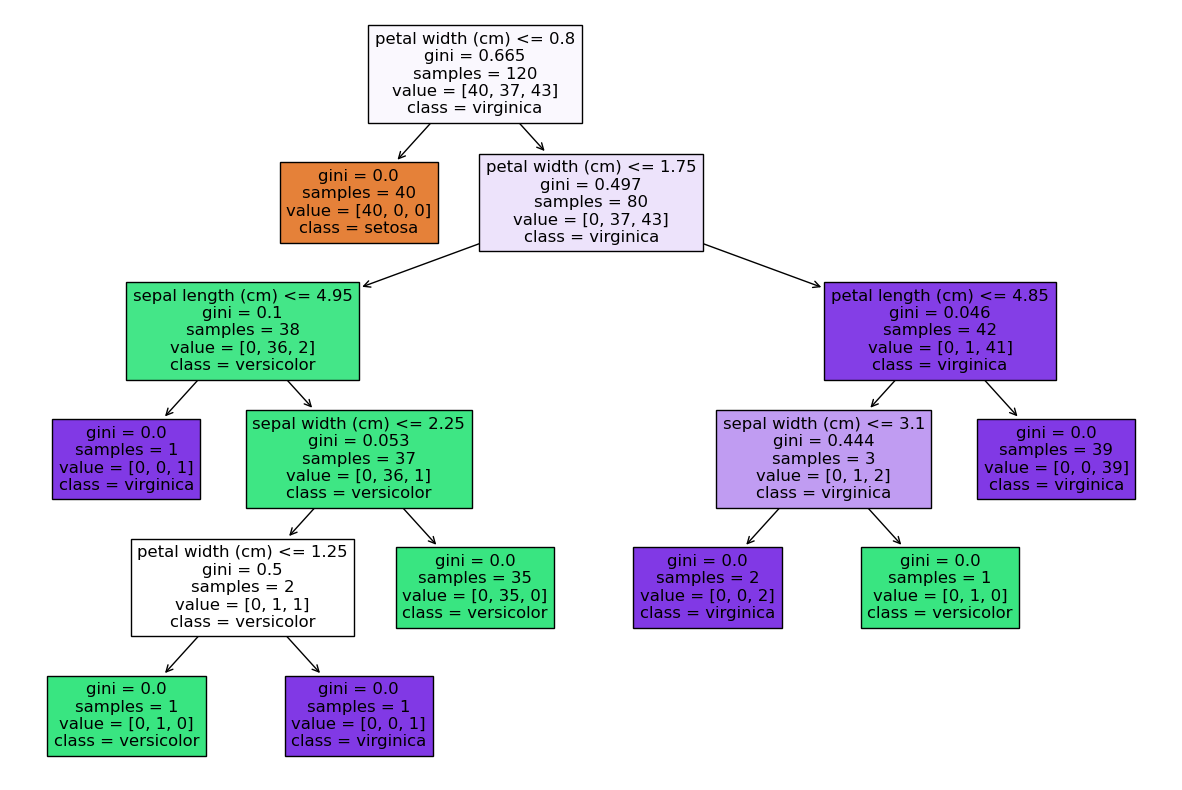

In [10]:
# Visualizing the decision tree using plot_tree function from scikit-learn library and matplotlib for styling
plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)

plt.show()

In [11]:
# Predicting species on test set and calculating accuracy score
predictions = clf.predict(test[iris.feature_names])
accuracy_score = clf.score(test[iris.feature_names], test['species'])
print('Accuracy Score:', accuracy_score)

Accuracy Score: 0.8333333333333334


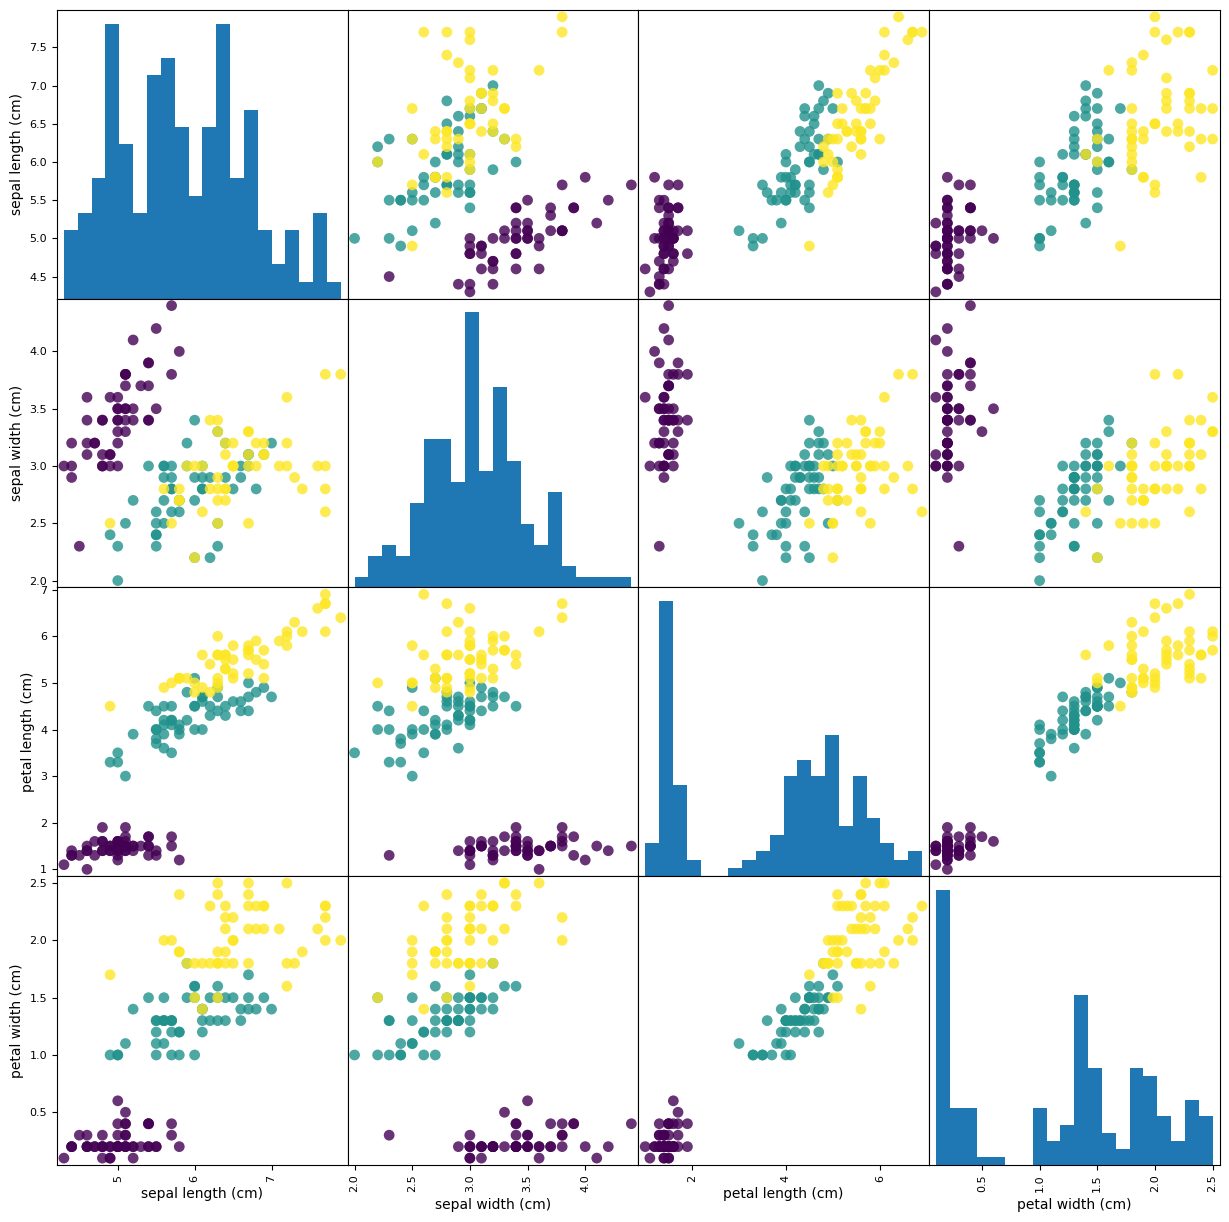

In [12]:
pd.plotting.scatter_matrix(df[iris.feature_names], c=iris.target, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.show()


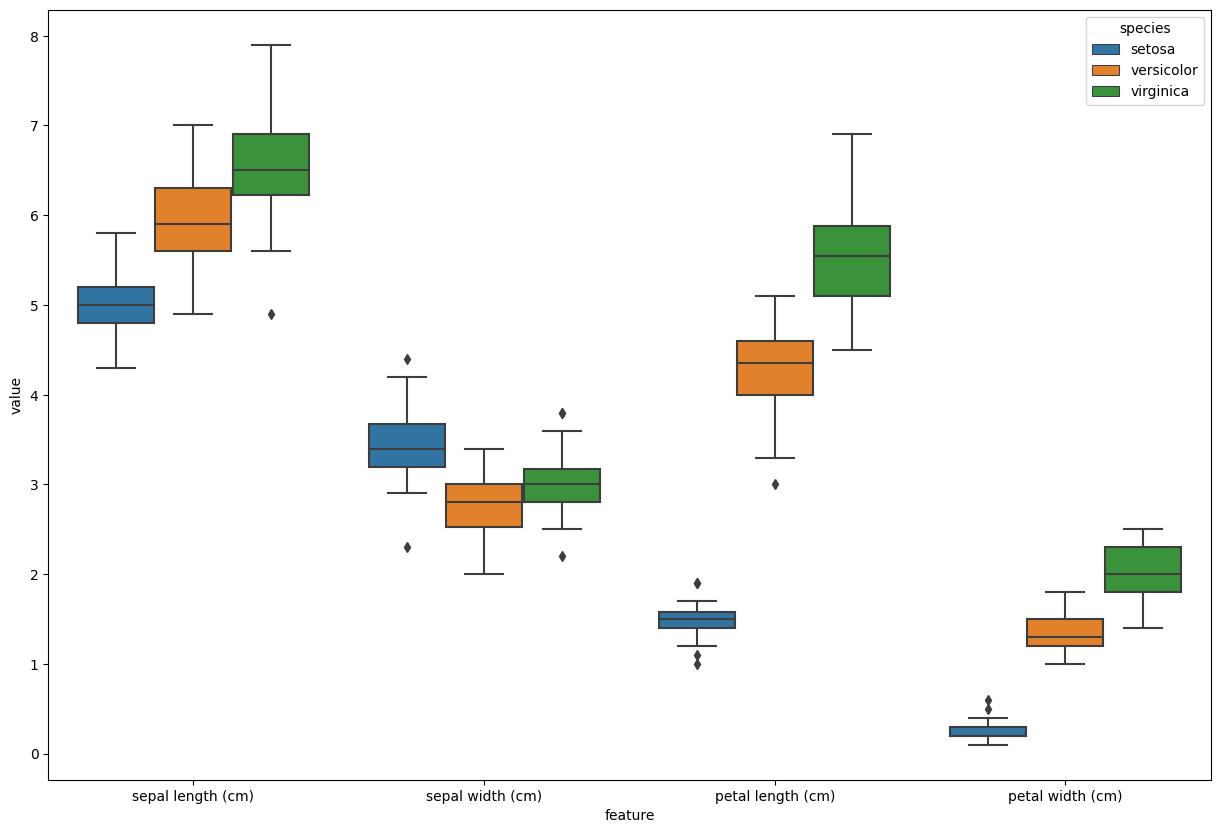

In [14]:
import seaborn as sns
df_melt = pd.melt(df, id_vars=["species"], var_name="feature", value_name="value")
plt.figure(figsize=(15, 10))
sns.boxplot(x="feature", y="value", hue="species", data=df_melt)
plt.show()


<ipython-input-15-f47c99424a14>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


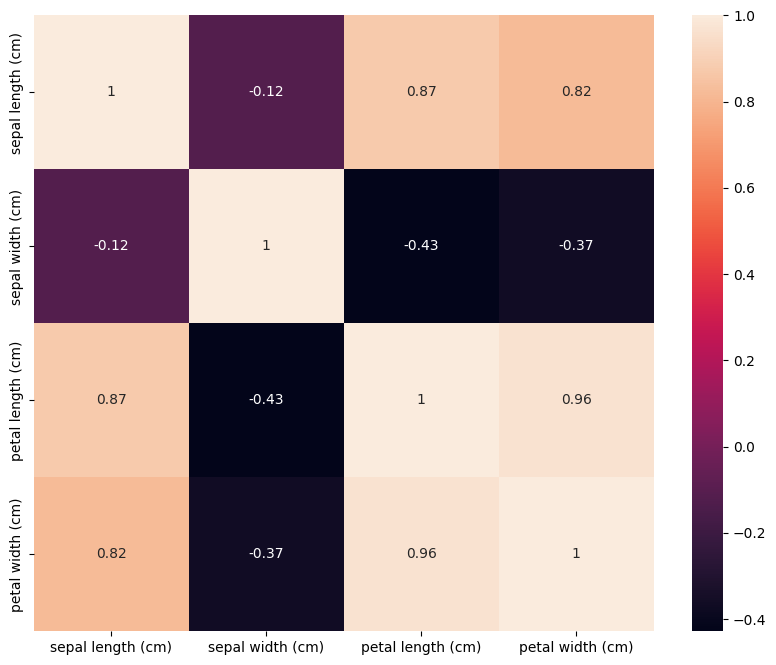

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()


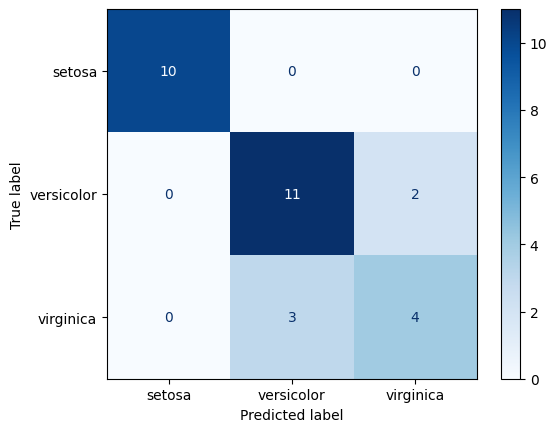

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicting species on test set
predictions = clf.predict(test[iris.feature_names])

# Calculating confusion matrix
cm = confusion_matrix(test['species'], predictions)

# Displaying confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)

plt.show()

